In [ ]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../'))

DATA_PATH = Path('../data/processed/dataset_cleaned.csv')

print(f"Data Source: {DATA_PATH}")

plt.style.use('seaborn-v0_8-whitegrid')

sns.set_palette('Set2')pd.set_option('display.precision', 2)

plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', None)

plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 10plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12

Using processed dataset: ..\data\processed\esg_data_cleaned.csv


In [ ]:
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Dataset not found: {DATA_PATH}. Run 01_data_cleaning.ipynb first.")

df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip()


print(f"Dataset Loaded Successfully")df.head(10)

print(f"Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

(503, 15)


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",21.05,4.05,6.1,8.9,NaN,2.0,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.30,12.80,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.20,10.60,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",21.05,4.05,6.1,8.9,NaN,2.0,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.60,0.10,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [ ]:
print("Dataset Structure")
print("=" * 80)
df.info(verbose=True, show_counts=True)


print("\n" + "=" * 80)df.describe(include='all').transpose()

print("Statistical Summary")print("=" * 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 502 non-null    object 
 3   Sector                  502 non-null    object 
 4   Industry                502 non-null    object 
 5   Full Time Employees     498 non-null    object 
 6   Description             502 non-null    object 
 7   Total ESG Risk score    503 non-null    float64
 8   Environment Risk Score  503 non-null    float64
 9   Governance Risk Score   503 non-null    float64
 10  Social Risk Score       503 non-null    float64
 11  Controversy Level       430 non-null    object 
 12  Controversy Score       503 non-null    float64
 13  ESG Risk Percentile     430 non-null    object 
 14  ESG Risk Level          430 non-null    ob

,count,mean,std,min,25%,50%,75%,max
Total ESG Risk score,503.0,21.463519,6.370885,7.1,16.9,21.05,25.15,41.7
Environment Risk Score,503.0,5.494533,4.745167,0.0,2.0,4.05,8.00,25.0
Governance Risk Score,503.0,6.634394,2.053097,3.0,5.4,6.10,7.40,19.4
Social Risk Score,503.0,9.045726,3.382050,0.8,7.2,8.90,10.80,22.5
Controversy Score,503.0,2.005964,0.709893,1.0,2.0,2.00,2.00,5.0


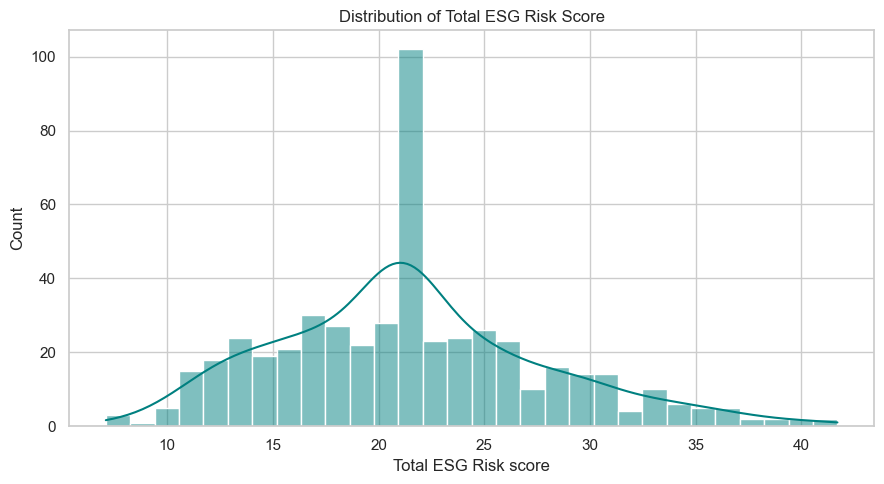

In [ ]:
metric_col = 'Total ESG Risk score'

if metric_col not in df.columns:
    raise KeyError(f"Column '{metric_col}' not found in dataset")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df[metric_col].dropna(), bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df[metric_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[metric_col].mean():.2f}')
axes[0].axvline(df[metric_col].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df[metric_col].median():.2f}')

axes[0].set_xlabel('ESG Risk Score')print(f"Max:      {df[metric_col].max():.2f}")

axes[0].set_ylabel('Frequency')print(f"Min:      {df[metric_col].min():.2f}")

axes[0].set_title('ESG Risk Score Distribution')print(f"Std Dev:  {df[metric_col].std():.2f}")

axes[0].legend()print(f"Median:   {df[metric_col].median():.2f}")

axes[0].grid(axis='y', alpha=0.3)print(f"Mean:     {df[metric_col].mean():.2f}")

print(f"Statistics for {metric_col}:")

axes[1].boxplot(df[metric_col].dropna(), vert=True, patch_artist=True, 

                boxprops=dict(facecolor='lightblue', color='black'),plt.show()

                whiskerprops=dict(color='black'),plt.tight_layout()

                capprops=dict(color='black'),

                medianprops=dict(color='red', linewidth=2))axes[1].grid(axis='y', alpha=0.3)

axes[1].set_ylabel('ESG Risk Score')axes[1].set_title('ESG Risk Score Box Plot')

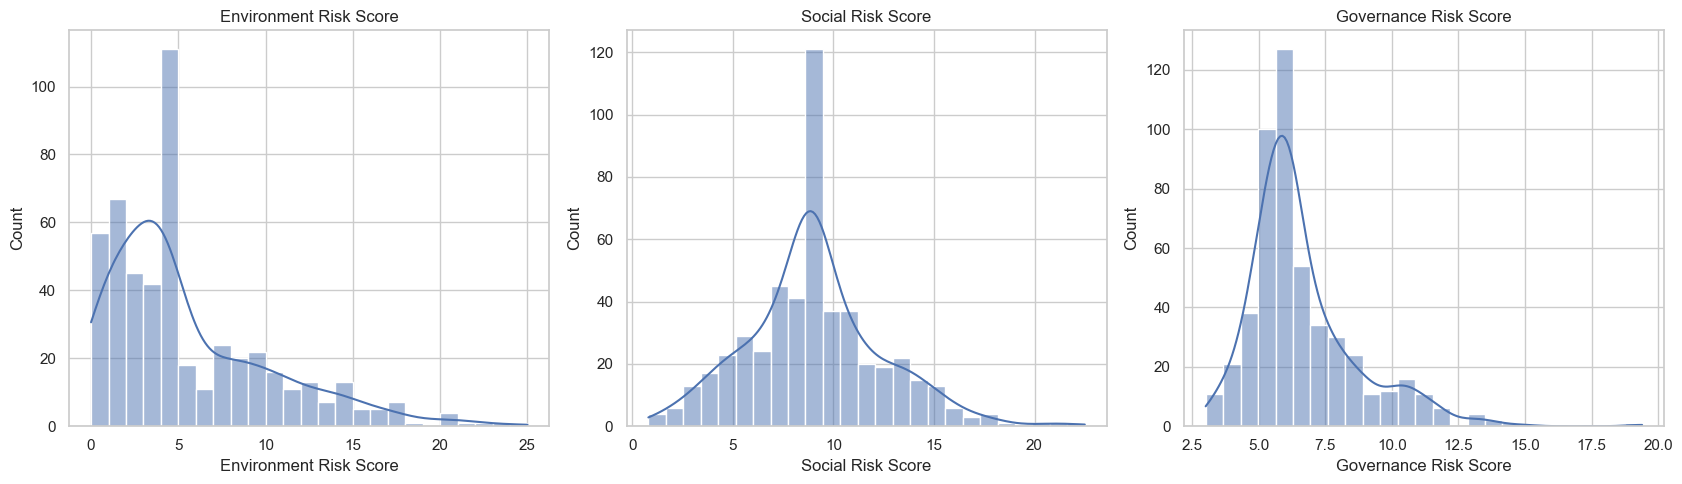

In [ ]:
score_cols = ['Environment Risk Score', 'Social Risk Score', 'Governance Risk Score']

missing_scores = [c for c in score_cols if c not in df.columns]
if missing_scores:
    raise KeyError(f"Missing columns: {missing_scores}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, col in enumerate(score_cols):
    row = idx // 3
    col_idx = idx % 3

        print(f"  Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}, Std: {df[col].std():.2f}")

    axes[0, col_idx].hist(df[col].dropna(), bins=35, color=sns.color_palette('Set2')[idx],     print(f"\n{col}:")

                          edgecolor='black', alpha=0.7)for col in score_cols:

    axes[0, col_idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2)print("=" * 80)

    axes[0, col_idx].set_xlabel('Risk Score')print("Component Statistics")

    axes[0, col_idx].set_ylabel('Frequency')

    axes[0, col_idx].set_title(f'{col} - Distribution')plt.show()

    axes[0, col_idx].grid(axis='y', alpha=0.3)plt.tight_layout()

    

    axes[1, col_idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,    axes[1, col_idx].grid(axis='y', alpha=0.3)

                             boxprops=dict(facecolor=sns.color_palette('Set2')[idx], alpha=0.7),    axes[1, col_idx].set_title(f'{col} - Box Plot')

                             medianprops=dict(color='red', linewidth=2))    axes[1, col_idx].set_ylabel('Risk Score')

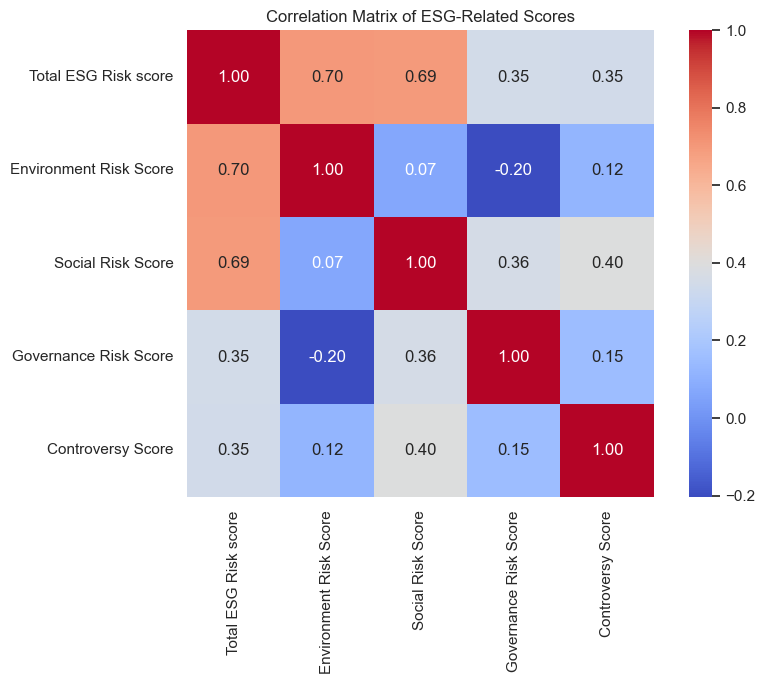

In [ ]:
corr_cols = ['Total ESG Risk score', 'Environment Risk Score', 'Social Risk Score', 
             'Governance Risk Score', 'Controversy Score']

missing = [c for c in corr_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}")

correlation_matrix = df[corr_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

            print(f"High correlation: {col1} <-> {col2}: {corr_val:.3f}")

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))        if abs(corr_val) > 0.7:

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r',         corr_val = correlation_matrix.loc[col1, col2]

            square=True, linewidths=1, cbar_kws={'shrink': 0.8},    for col2 in corr_cols[i+1:]:

            vmin=-1, vmax=1, center=0, ax=axes[0])for i, col1 in enumerate(corr_cols):

axes[0].set_title('Correlation Matrix - All Features')print("=" * 80)

print("Correlation Analysis")

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.3f', cmap='RdYlBu_r',

            square=True, linewidths=1, cbar_kws={'shrink': 0.8},plt.show()

            vmin=-1, vmax=1, center=0, ax=axes[1])plt.tight_layout()

axes[1].set_title('Correlation Matrix - Lower Triangle')